<h2>Data Science Assignment</h2>

<h3>Library Import</h3>

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import time

<h3>Benchmarking Functions</h3>

In [3]:
class Timer:
    def __init__(self):
        self.start_time = time.time()
        self.end_time = time.time()

    def restart(self):
        self.start_time = time.time()

    def get_time(self, coefficient=1000):
        return (time.time() - self.start_time) * coefficient

def plot_fitness_progress(values, title, x_label = "Iteration", y_label = "Best Fitness Value"):
    plt.plot(range(len(values)), values)
    plt.title(title)
    plt.ylim(min(values))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

<h3>Sum of Squares Function And Rastrigin Function</h3>
<h5>Including the Problem Definition and Parameters</h5>

In [12]:
cutoff_point = 1e-3

dimension_sos = 5
dimension_rastrigin = 3
max_iterations_hillClimber = 250
max_iterations_PSO = 250

def sum_of_squares(x):
    return np.sum(np.square(x))

sum_squares_bounds = (-10, 10)
sum_squares_mutation_rate = 0.3
sum_squares_mutation_range = 2

def rastrigin(x):
    n = len(x)
    return 10 * n + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

rastrigin_bounds = (-5.12, 5.12)
rastrigin_mutation_rate = 0.3
rastrigin_mutation_range = 1

convergence_target = 10e-3

timer = Timer()

<h3>Hill Climbing Algorithm</h3>

In [13]:
class HillClimber:
    def __init__(self, title, dimension, fitness_func, bounds, num_iterations, mutation_rate, mutation_range, cutoff=cutoff_point):
        self.title = title
        self.dimension = dimension
        self.fitness_func = fitness_func
        self.bounds = bounds
        self.num_iterations = num_iterations
        self.mutation_rate = mutation_rate
        self.mutation_range = mutation_range
        self.results = None
        self.rememberme = cutoff
        self.cutoff = cutoff
        self.timeforcutoff = None
        self.iterationcountforcutoff = None

    def hill_climb(self): # main function
        self.preconditions()
        sol1 = self.get_random_solution() # random initialization
        fit1 = self.fitness_func(sol1)  # function initialization
        best_fitnesses = [fit1]
        
        for i in range(self.num_iterations):
            sol2 = self.mutate(sol1) 
            fit2 = self.fitness_func(sol2)
            if fit2 < fit1:
                sol1 = sol2
                fit1 = fit2
            best_fitnesses.append(fit1)
            if self.cutoff is not None:
                if np.all(abs(fit1) < self.cutoff):
                    self.cutoff = None
                    self.timeforcutoff = timer.get_time()
                    self.iterationcountforcutoff = i
            
        self.results = best_fitnesses
        self.best_solution = sol1
        return sol1

    def get_random_solution(self):
        return np.random.uniform(self.bounds[0], self.bounds[1], self.dimension)

    def evaluate(self, graph=False):
        time_taken = timer.get_time()
        
        if graph:
            plot_fitness_progress(self.results, title = self.title)
            print("Best Solution:", self.best_solution)
            print("Time in Milliseconds:", time_taken)
            if self.timeforcutoff is not None:
                print("Time for Cutoff:", self.timeforcutoff)
                print("Iteration for Cutoff:", self.iterationcountforcutoff)
                
        if self.timeforcutoff is None:
            self.timeforcutoff = time_taken
        if self.iterationcountforcutoff is None:
            self.iterationcountforcutoff = self.num_iterations
        self.results = None
        return self.best_solution, time_taken , self.iterationcountforcutoff, self.timeforcutoff

    def preconditions(self):
        timer.restart()
        self.timeforcutoff = None
        self.iterationcountforcutoff = None
        self.cutoff = self.rememberme

    def mutate(self, solution):
        new_sol = solution.copy()
        for i in range(len(new_sol)):
            if random.random() < self.mutation_rate:
                new_sol[i] += random.uniform(-self.mutation_range, self.mutation_range)
                
        return new_sol

In [14]:
def hillClimberAvg(climber, runs = 50):
    timeList = []
    solList = []
    allSolList = []
    iterlist = []
    cutofflist = []
    for i in range(runs):
        temp = climber.hill_climb()
        allSolList.append(climber.results)
        best_solution, time_in_ms, cutoff_iter, cutoff_time = climber.evaluate()
        timeList.append(time_in_ms)
        solList.append(best_solution)
        cutofflist.append(cutoff_time)
        iterlist.append(cutoff_iter)
        
    avgSol = np.mean(solList, axis = 0)
    avgTime = sum(timeList)/runs
    avgCutoff = sum(cutofflist)/runs
    avgIter = sum(iterlist)/runs
    avgSolList =  np.mean(allSolList, axis = 0)
    
    plot_fitness_progress(avgSolList, title = hill_climber.title+" (Average of "+str(runs)+" Runs)")
    
    print("Average Best Solution:", avgSol)
    print("Average Time in Milliseconds:", avgTime)

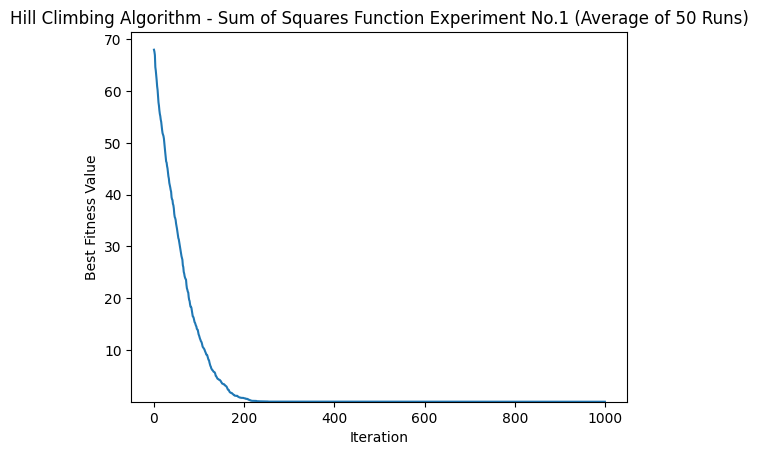

Average Best Solution: [-0.00237538 -0.00073048]
Average Time in Milliseconds: 5.03331184387207


In [15]:
hill_climber = HillClimber(
    title="Hill Climbing Algorithm - Sum of Squares Function Experiment No.1",
    dimension=2,
    fitness_func=sum_of_squares,
    bounds=[-10, 10],
    num_iterations=1000,
    mutation_rate=0.2,
    mutation_range=1,
    cutoff = None
)
hillClimberAvg(hill_climber)

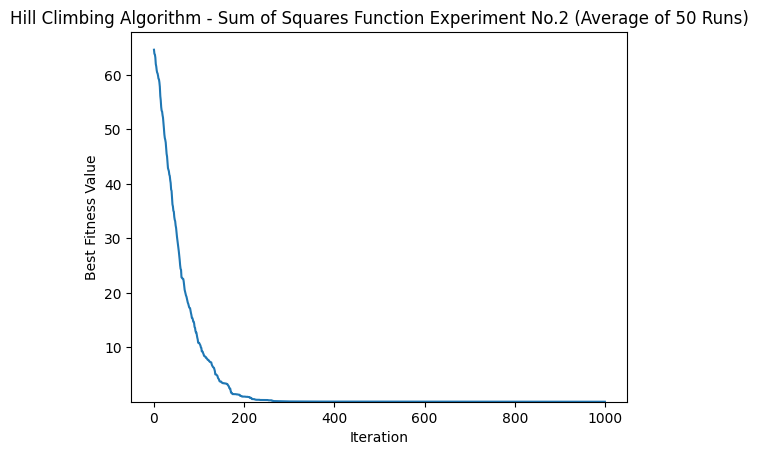

Average Best Solution: [ 0.00172958 -0.00120751]
Average Time in Milliseconds: 5.4328107833862305


In [16]:
hill_climber = HillClimber(
    title="Hill Climbing Algorithm - Sum of Squares Function Experiment No.2",
    dimension=2,
    fitness_func=sum_of_squares,
    bounds=[-10, 10],
    num_iterations=1000,
    mutation_rate=0.1,
    mutation_range=2,
    cutoff = None
)
hillClimberAvg(hill_climber)

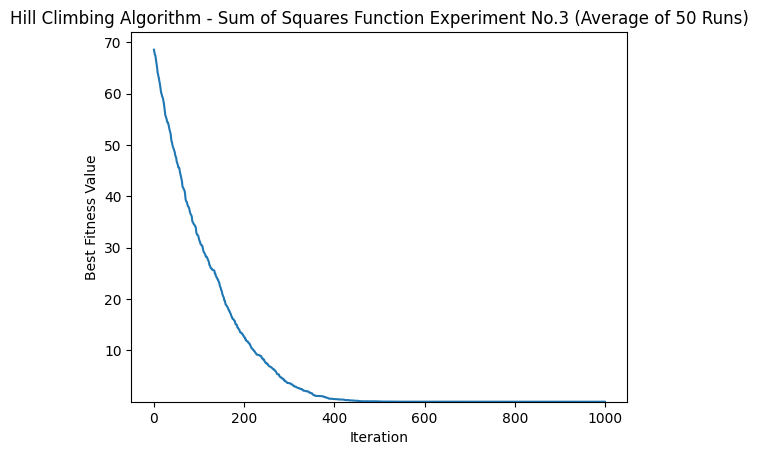

Average Best Solution: [-0.0029372   0.00120648]
Average Time in Milliseconds: 4.794249534606934


In [17]:
hill_climber = HillClimber(
    title="Hill Climbing Algorithm - Sum of Squares Function Experiment No.3",
    dimension=2,
    fitness_func=sum_of_squares,
    bounds=[-10, 10],
    num_iterations=1000,
    mutation_rate=0.1,
    mutation_range=1.0,
    cutoff = None
)
hillClimberAvg(hill_climber)


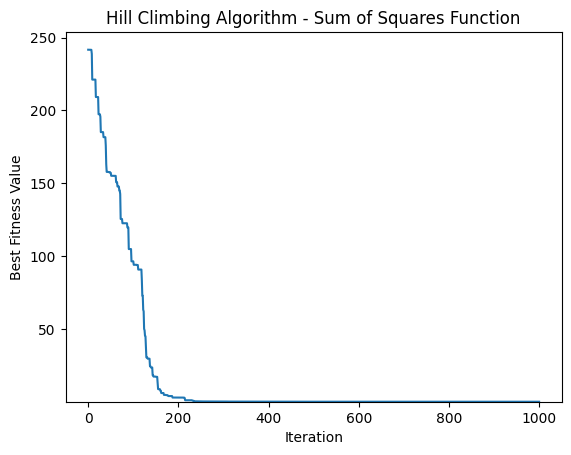

Best Solution: [ 0.00452413  0.0237204  -0.0031882  -0.00594073  0.00616766]
Time in Milliseconds: 11.98434829711914
Time for Cutoff: 11.98434829711914
Iteration for Cutoff: 852


(array([ 0.00452413,  0.0237204 , -0.0031882 , -0.00594073,  0.00616766]),
 11.98434829711914,
 852,
 11.98434829711914)

In [18]:
hill_climber = HillClimber(
    title="Hill Climbing Algorithm - Sum of Squares Function",
    dimension=dimension_sos,
    fitness_func=sum_of_squares,
    bounds=sum_squares_bounds,
    num_iterations=1000,
    mutation_rate=0.2,
    mutation_range=1
)
hill_climber.hill_climb()
hill_climber.evaluate(graph = True)

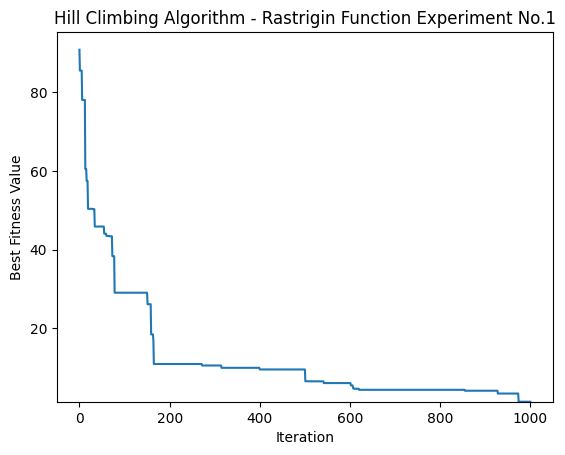

Best Solution: [-0.02599553  1.02822525 -0.01324198]
Time in Milliseconds: 15.97738265991211


(array([-0.02599553,  1.02822525, -0.01324198]),
 15.97738265991211,
 1000,
 15.97738265991211)

In [20]:
hill_climber = HillClimber(
    title="Hill Climbing Algorithm - Rastrigin Function Experiment No.1",
    dimension=dimension_rastrigin,
    fitness_func=rastrigin,
    bounds=rastrigin_bounds,
    num_iterations=1000,
    mutation_rate=0.2,
    mutation_range=1
)
hill_climber.hill_climb()
hill_climber.evaluate(graph = True)

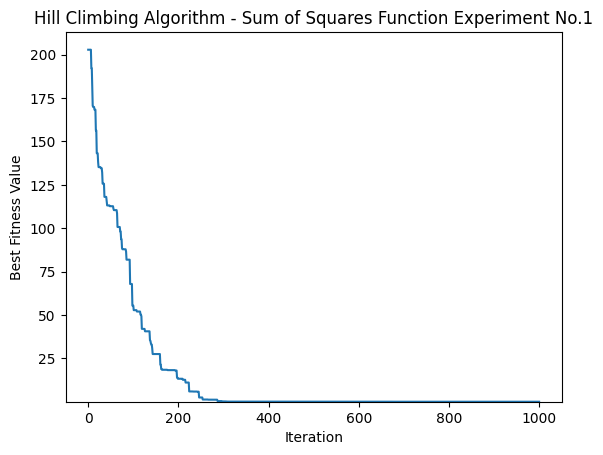

Best Solution: [ 0.00125634 -0.01850723  0.00687177 -0.04706116 -0.01320634]
Time in Milliseconds: 15.978336334228516


(array([ 0.00125634, -0.01850723,  0.00687177, -0.04706116, -0.01320634]),
 15.978336334228516,
 1000,
 15.978336334228516)

In [21]:
hill_climber = HillClimber(
    title="Hill Climbing Algorithm - Sum of Squares Function Experiment No.1",
    dimension=dimension_sos,
    fitness_func=sum_of_squares,
    bounds=sum_squares_bounds,
    num_iterations=1000,
    mutation_rate=0.2,
    mutation_range=1
)
hill_climber.hill_climb()
hill_climber.evaluate(graph = True)

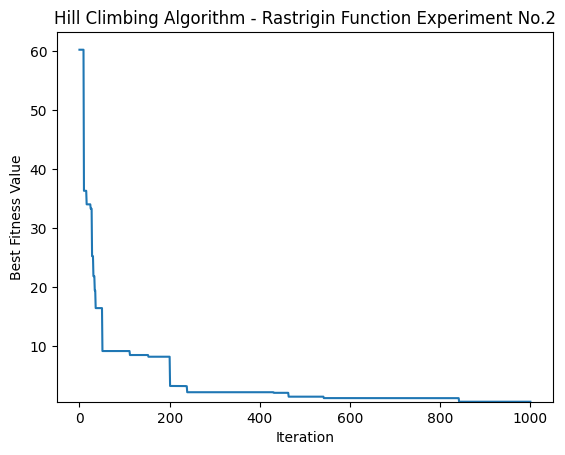

Best Solution: [0.00638285 0.03678724 0.03908919]
Time in Milliseconds: 19.972562789916992


(array([0.00638285, 0.03678724, 0.03908919]),
 19.972562789916992,
 1000,
 19.972562789916992)

In [25]:
hill_climber = HillClimber(
    title="Hill Climbing Algorithm - Rastrigin Function Experiment No.2",
    dimension=dimension_rastrigin,
    fitness_func=rastrigin,
    bounds=rastrigin_bounds,
    num_iterations=1000,
    mutation_rate=0.1,
    mutation_range=2
)
hill_climber.hill_climb()
hill_climber.evaluate(graph = True)

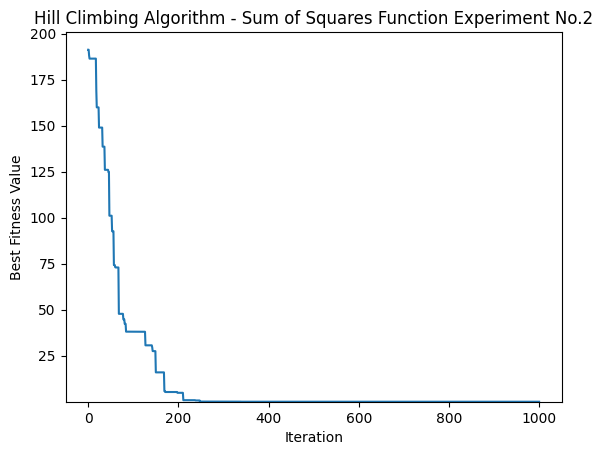

Best Solution: [ 0.01407771 -0.01468525 -0.00343552  0.01718612  0.02126343]
Time in Milliseconds: 12.016057968139648


(array([ 0.01407771, -0.01468525, -0.00343552,  0.01718612,  0.02126343]),
 12.016057968139648,
 1000,
 12.016057968139648)

In [26]:
hill_climber = HillClimber(
    title="Hill Climbing Algorithm - Sum of Squares Function Experiment No.2",
    dimension=dimension_sos,
    fitness_func=sum_of_squares,
    bounds=sum_squares_bounds,
    num_iterations=1000,
    mutation_rate=0.1,
    mutation_range=2
)
hill_climber.hill_climb()
hill_climber.evaluate(graph = True)

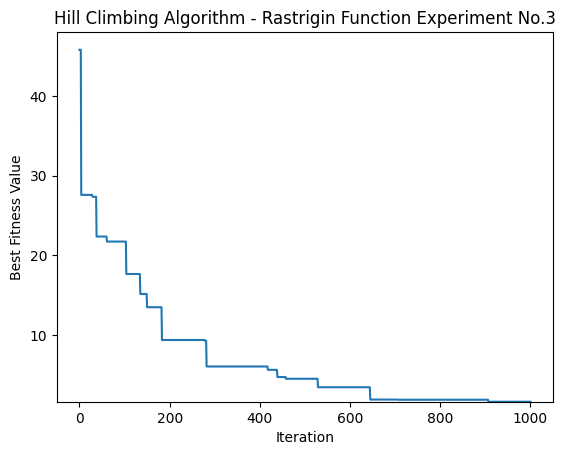

Best Solution: [ 1.03758735 -0.02989355  0.02119312]
Time in Milliseconds: 15.978336334228516


(array([ 1.03758735, -0.02989355,  0.02119312]),
 15.978336334228516,
 1000,
 15.978336334228516)

In [30]:
hill_climber = HillClimber(
    title="Hill Climbing Algorithm - Rastrigin Function Experiment No.3",
    dimension=dimension_rastrigin,
    fitness_func=rastrigin,
    bounds=rastrigin_bounds,
    num_iterations=1000,
    mutation_rate=0.1,
    mutation_range=1.0
)
hill_climber.hill_climb()
hill_climber.evaluate(graph = True)

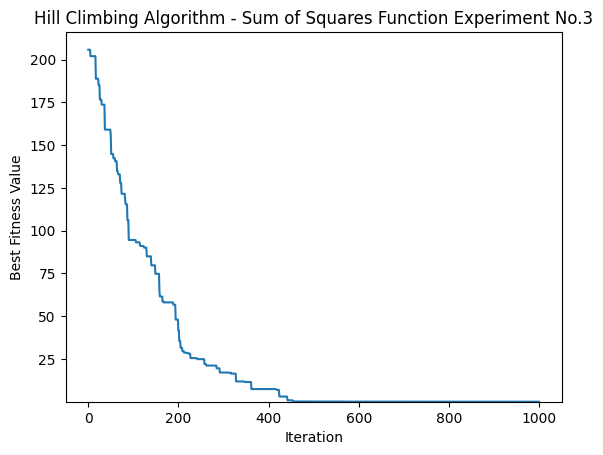

Best Solution: [-0.00881198  0.0064118  -0.04084954 -0.01730797  0.03803728]
Time in Milliseconds: 11.984586715698242


(array([-0.00881198,  0.0064118 , -0.04084954, -0.01730797,  0.03803728]),
 11.984586715698242,
 1000,
 11.984586715698242)

In [31]:
hill_climber = HillClimber(
    title="Hill Climbing Algorithm - Sum of Squares Function Experiment No.3",
    dimension=dimension_sos,
    fitness_func=sum_of_squares,
    bounds=sum_squares_bounds,
    num_iterations=1000,
    mutation_rate=0.1,
    mutation_range=1.0
)
hill_climber.hill_climb()
hill_climber.evaluate(graph = True)

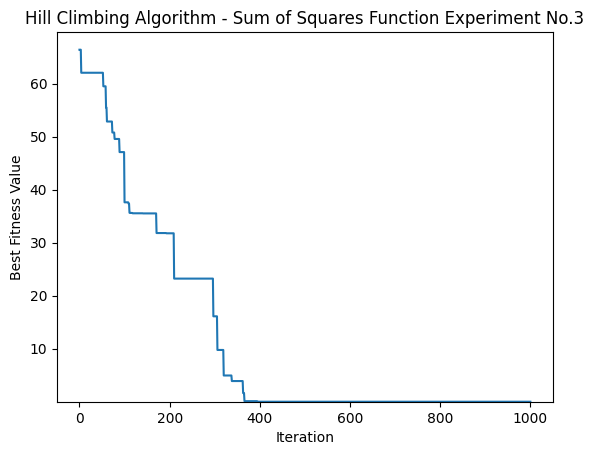

Best Solution: [0.02040871 0.00288296]
Time in Milliseconds: 7.967472076416016
Time for Cutoff: 7.967472076416016
Iteration for Cutoff: 502


(array([0.02040871, 0.00288296]), 7.967472076416016, 502, 7.967472076416016)

In [32]:
dimension = 2  # Number of variables in the Rastrigin function
bounds = [-5.12, 5.12]  # Range of values for each variable in the Rastrigin function
num_iterations = 1000  # Maximum number of iterations for the hill climbing algorithm
mutation_rate = 0.2  # Probability of mutation per variable
mutation_range = 1.0  # Range within which variables can be mutated

hill_climber = HillClimber(
    title="Hill Climbing Algorithm - Sum of Squares Function Experiment No.3",
    dimension=2,
    fitness_func=sum_of_squares,
    bounds=[-10, 10],
    num_iterations=1000,
    mutation_rate=0.1,
    mutation_range=1.0
)
hill_climber.hill_climb()
hill_climber.evaluate(graph = True)

<h3>Particle Swarm Optimization Algorithm</h3>

In [33]:
class Particle:
    def __init__(self, dimension, bounds):
        self.position = np.random.uniform(bounds[0], bounds[1], dimension)
        self.velocity = np.random.uniform(-1, 1, dimension)
        self.best_position = self.position.copy()
        self.best_fitness = float('inf')

class ParticleSwarmOptimizer:
    def __init__(self, title, dimension, fitness_func, bounds, num_iterations, num_particles = 5):
        self.title = title
        self.dimension = dimension
        self.bounds = bounds
        self.fitness_func = fitness_func
        self.num_particles = num_particles
        self.num_iterations = num_iterations
        self.particles = self.initialize_particles()
        self.results = None
        self.best_solution = None

    def initialize_particles(self):
        return [Particle(self.dimension, self.bounds) for i in range(self.num_particles)]

    def preconditions(self):
        timer.restart()

    def evaluate(self):
        plot_fitness_progress(self.results, title = self.title)
        self.results = None
        print("Best Solution:", self.best_solution)
        time_taken = timer.get_time()
        print("Time in Milliseconds:", time_taken)
        return self.best_solution, time_taken
        
    def particle_swarm_optimize(self):
        self.preconditions()
        current_best_position = None
        current_best_fitness = float('inf')
        best_fitnesses = []

        for i in range(self.num_iterations):
            for particle in self.particles:
                fitness = self.fitness_func(particle.position)
                if fitness < particle.best_fitness:
                    particle.best_position = particle.position.copy()
                    particle.best_fitness = fitness

                if fitness < current_best_fitness:
                    current_best_position = particle.position.copy()
                    current_best_fitness = fitness

            for particle in self.particles:
                for j in range(self.dimension):
                    r1, r2 = random.random(), random.random()
                    particle.velocity[j] = 0.5 * particle.velocity[j] + 2 * r1 * (particle.best_position[j] - particle.position[j]) + 2 * r2 * (current_best_position[j] - particle.position[j])
                    particle.position[j] += particle.velocity[j]

            best_fitnesses.append(current_best_fitness)

        self.results = best_fitnesses
        self.best_solution = current_best_position
        
        return current_best_position

<h3>Implementation</h3>

<h4>Hill Climber for Sum of Squares Function</h4>

In [34]:
dimension = 2  # Number of variables in the sum of squares function
bounds = [-10, 10]  # Range of values for each variable in the sum of squares function
num_iterations = 1000  # Maximum number of iterations for the hill climbing algorithm
mutation_rate = 0.1  # Probability of mutation per variable
mutation_range = 1.0  # Range within which variables can be mutated

hill_climber = HillClimber(
    title="Hill Climbing Algorithm - Sum of Squares Function",
    dimension=dimension,
    fitness_func=sum_of_squares,
    bounds=bounds,
    num_iterations=num_iterations,
    mutation_rate=mutation_rate,
    mutation_range=mutation_range
)
hill_climber.hill_climb()
hill_climber.evaluate()

(array([ 0.00513086, -0.00614546]), 7.988691329956055, 465, 3.994464874267578)

<h3>Hill Climber for Rastrigin Function</h3>

In [35]:
dimension = 2  # Number of variables in the Rastrigin function
bounds = [-5.12, 5.12]  # Range of values for each variable in the Rastrigin function
num_iterations = 1000  # Maximum number of iterations for the hill climbing algorithm
mutation_rate = 0.2  # Probability of mutation per variable
mutation_range = 1.0  # Range within which variables can be mutated

hill_climber = HillClimber(
    title="Hill Climbing Algorithm - Rastrigin Function",
    dimension=dimension,
    fitness_func=rastrigin,
    bounds=bounds,
    num_iterations=num_iterations,
    mutation_rate=mutation_rate,
    mutation_range=mutation_range
)
hill_climber.hill_climb()
hill_climber.evaluate()

(array([ 0.00579182, -0.03975643]),
 23.967742919921875,
 1000,
 23.967742919921875)

<h4>Particle Swarm Optimizer for Sum of Squares Function</h4>

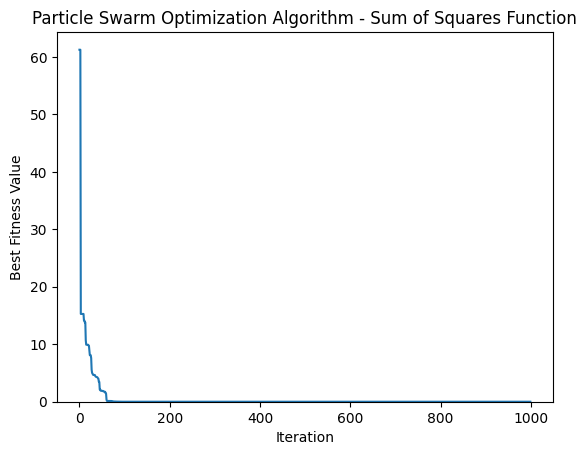

Best Solution: [-3.41695350e-29 -1.78549814e-28 -3.85070382e-29 -3.98679600e-30
  4.85379701e-29]
Time in Milliseconds: 171.77128791809082


In [36]:
# Define parameters
title = "Particle Swarm Optimization Algorithm - Sum of Squares Function"
dimension = 5  # Assuming the dimension for the sum of squares function
fitness_func = sum_of_squares
bounds = [-10, 10]  # Bounds for each dimension of the sum of squares function
num_iterations = 1000  # Number of iterations for the PSO algorithm

# Create an instance of ParticleSwarmOptimizer
PSO = ParticleSwarmOptimizer(
    title=title,
    dimension=dimension,
    fitness_func=fitness_func,
    bounds=bounds,
    num_iterations=num_iterations
)

# Run PSO optimization
best_solution_PSO_sos = PSO.particle_swarm_optimize()

# Evaluate and print results
best_solution_PSO_sos, time_for_PSO_sos = PSO.evaluate()


<h4>Particle Swarm Optimizer for Rastrigin Function</h4>

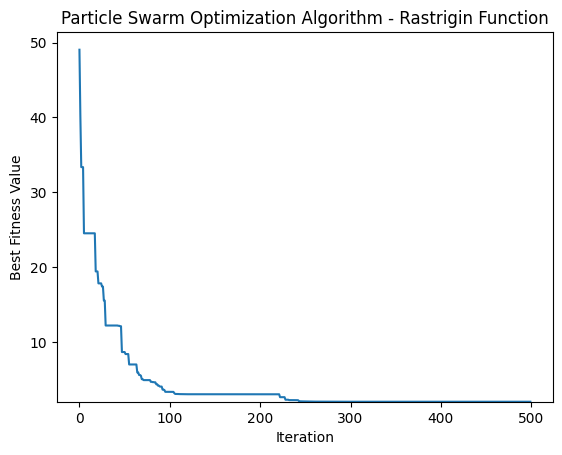

Best Solution: [ 8.84266346e-10 -9.94958637e-01  2.27030225e-09 -8.22682437e-10
 -9.94958638e-01]
Time in Milliseconds: 191.72167778015137


In [37]:
# Define parameters
title_rastrigin = "Particle Swarm Optimization Algorithm - Rastrigin Function"
dimension_rastrigin = 5  # Assuming the dimension for the Rastrigin function
fitness_func_rastrigin = rastrigin
bounds_rastrigin = [-5.12, 5.12]  # Bounds for each dimension of the Rastrigin function
num_iterations_rastrigin = 500  # Number of iterations for the PSO algorithm
num_particles_rastrigin = 10  # Number of particles in the swarm

# Create an instance of ParticleSwarmOptimizer for Rastrigin function
PSO_rastrigin = ParticleSwarmOptimizer(
    title=title_rastrigin,
    dimension=dimension_rastrigin,
    fitness_func=fitness_func_rastrigin,
    bounds=bounds_rastrigin,
    num_iterations=num_iterations_rastrigin,
    num_particles=num_particles_rastrigin
)

# Run PSO optimization for Rastrigin function
best_solution_PSO_rastrigin = PSO_rastrigin.particle_swarm_optimize()

# Evaluate and print results for Rastrigin function
best_solution_PSO_rastrigin, time_for_PSO_rastrigins = PSO_rastrigin.evaluate()


In [38]:
class Particle:
    def __init__(self, dimension, bounds):
        self.position = np.random.uniform(bounds[0], bounds[1], dimension)
        self.velocity = np.random.uniform(-1, 1, dimension)
        self.best_position = self.position.copy()
        self.best_fitness = float('inf')

class ParticleSwarmOptimizer:
    def __init__(self, title, dimension, fitness_func, bounds, num_iterations, num_particles=5, w=0.5, c1=1.5, c2=1.5):
        self.title = title
        self.dimension = dimension
        self.bounds = bounds
        self.fitness_func = fitness_func
        self.num_particles = num_particles
        self.num_iterations = num_iterations
        self.w = w  # Inertia weight
        self.c1 = c1  # Cognitive component
        self.c2 = c2  # Social component
        self.particles = self.initialize_particles()
        self.results = None
        self.best_solution = None

    def initialize_particles(self):
        return [Particle(self.dimension, self.bounds) for _ in range(self.num_particles)]

    def preconditions(self):
        timer.restart()

    def evaluate(self):
        # Plot fitness progress and print best solution
        plot_fitness_progress(self.results, title=self.title)
        print("Best Solution:", self.best_solution)
        time_taken = timer.get_time()
        print("Time in Milliseconds:", time_taken)
        return self.best_solution, time_taken

    def particle_swarm_optimize(self):
        self.preconditions()
        current_best_position = None
        current_best_fitness = float('inf')
        best_fitnesses = []
    
        for i in range(self.num_iterations):
            for particle in self.particles:
                fitness = self.fitness_func(particle.position)
                if fitness < particle.best_fitness:
                    particle.best_position = particle.position.copy()
                    particle.best_fitness = fitness
    
                if fitness < current_best_fitness:
                    current_best_position = particle.position.copy()
                    current_best_fitness = fitness
    
            cognitive_component = None  # Initialize outside the loop
            social_component = None  # Initialize outside the loop
    
            for particle in self.particles:
                if particle.best_position is not None:
                    cognitive_component = self.c1 * random.uniform(0, 1) * (particle.best_position - particle.position)
                if current_best_position is not None:
                    social_component = self.c2 * random.uniform(0, 1) * (current_best_position - particle.position)
                
                for j in range(self.dimension):
                    particle.velocity[j] = (self.w * particle.velocity[j] +
                                             cognitive_component[j] +
                                             social_component[j])
                    particle.position[j] += particle.velocity[j]
    
            # Store best fitness for this iteration
            best_fitnesses.append(current_best_fitness)
    
        self.results = best_fitnesses
        self.best_solution = current_best_position
        return self.best_solution

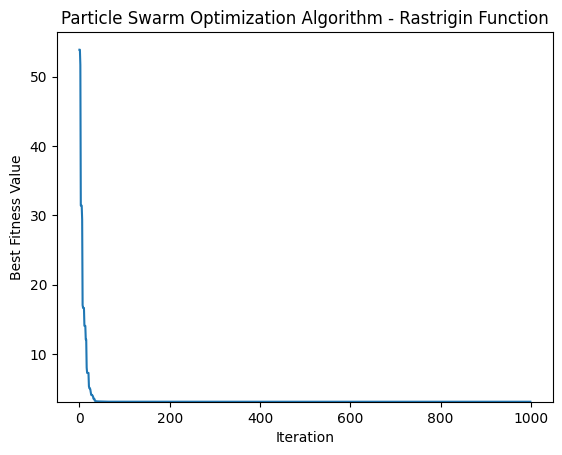

Best Solution: [-0.00126845  0.05515073  0.04006314 -1.00580505 -0.96148853]
Time in Milliseconds: 243.70360374450684


In [39]:
# Define parameters
title_rastrigin = "Particle Swarm Optimization Algorithm - Rastrigin Function"
dimension_rastrigin = 5  # Assuming the dimension for the Rastrigin function
fitness_func_rastrigin = rastrigin
bounds_rastrigin = [-5.12, 5.12]  # Bounds for each dimension of the Rastrigin function
num_iterations_rastrigin = 1000  # Number of iterations for the PSO algorithm
num_particles_rastrigin = 10  # Number of particles in the swarm

# Create an instance of ParticleSwarmOptimizer for Rastrigin function
PSO_rastrigin = ParticleSwarmOptimizer(
    title=title_rastrigin,
    dimension=dimension_rastrigin,
    fitness_func=fitness_func_rastrigin,
    bounds=bounds_rastrigin,
    num_iterations=num_iterations_rastrigin,
    num_particles=num_particles_rastrigin
)

# Run PSO optimization for Rastrigin function
best_solution_PSO_rastrigin = PSO_rastrigin.particle_swarm_optimize()

# Evaluate and print results for Rastrigin function
best_solution_PSO_rastrigin, time_for_PSO_rastrigins = PSO_rastrigin.evaluate()


In [40]:
def particle_swarm_optimize(self):
    self.preconditions()
    current_best_position = None
    current_best_fitness = float('inf')
    best_fitnesses = []

    for i in range(self.num_iterations):
        for particle in self.particles:
            fitness = self.fitness_func(particle.position)
            if fitness < particle.best_fitness:
                particle.best_position = particle.position.copy()
                particle.best_fitness = fitness

            if fitness < current_best_fitness:
                current_best_position = particle.position.copy()
                current_best_fitness = fitness

        cognitive_component = None  # Initialize outside the loop
        social_component = None  # Initialize outside the loop

        for particle in self.particles:
            if particle.best_position is not None:
                cognitive_component = self.c1 * random.uniform(0, 1) * (particle.best_position - particle.position)
            if current_best_position is not None:
                social_component = self.c2 * random.uniform(0, 1) * (current_best_position - particle.position)
            
            for j in range(self.dimension):
                particle.velocity[j] = (self.w * particle.velocity[j] +
                                         cognitive_component[j] +
                                         social_component[j])
                particle.position[j] += particle.velocity[j]

        # Store best fitness for this iteration
        best_fitnesses.append(current_best_fitness)

    self.results = best_fitnesses
    self.best_solution = current_best_position
    return self.best_solution

In [41]:
class Particle:
    def __init__(self, dimension, bounds):
        self.position = np.random.uniform(bounds[0], bounds[1], dimension)
        self.velocity = np.random.uniform(-1, 1, dimension)
        self.best_position = self.position.copy()
        self.best_fitness = float('inf')

In [42]:
class ParticleSwarmOptimizer:
    def __init__(self, title, dimension, fitness_func, bounds, num_iterations, num_particles=5, w=0.5, c1=2, c2=2):
        self.title = title
        self.dimension = dimension
        self.bounds = bounds
        self.fitness_func = fitness_func
        self.num_particles = num_particles
        self.num_iterations = num_iterations
        self.w = w  # Inertia weight
        self.c1 = c1  # Cognitive component
        self.c2 = c2  # Social component
        self.particles = self.initialize_particles()
        self.results = None
        self.best_solution = None

    def initialize_particles(self):
        return [Particle(self.dimension, self.bounds) for i in range(self.num_particles)]

    def preconditions(self):
        timer.restart()

    def evaluate(self):
        plot_fitness_progress(self.results, title = self.title)
        self.results = None
        print("Best Solution:", self.best_solution)
        time_taken = timer.get_time()
        print("Time in Milliseconds:", time_taken)
        return self.best_solution, time_taken
        
    def particle_swarm_optimize(self):
        self.preconditions()
        current_best_position = None
        current_best_fitness = float('inf')
        best_fitnesses = []

        for i in range(self.num_iterations):
            for particle in self.particles:
                fitness = self.fitness_func(particle.position)
                if fitness < particle.best_fitness:
                    particle.best_position = particle.position.copy()
                    particle.best_fitness = fitness

                if fitness < current_best_fitness:
                    current_best_position = particle.position.copy()
                    current_best_fitness = fitness

            cognitive_component = None  # Initialize outside the loop
            social_component = None  # Initialize outside the loop
    
            for particle in self.particles:
                if particle.best_position is not None:
                    cognitive_component = self.c1 * random.uniform(0, 1) * (particle.best_position - particle.position)
                if current_best_position is not None:
                    social_component = self.c2 * random.uniform(0, 1) * (current_best_position - particle.position)
            
                for j in range(self.dimension):
                    particle.velocity[j] = (self.w * particle.velocity[j] + cognitive_component[j] + social_component[j])
                    particle.position[j] += particle.velocity[j]

            best_fitnesses.append(current_best_fitness)

        self.results = best_fitnesses
        self.best_solution = current_best_position
        
        return current_best_position

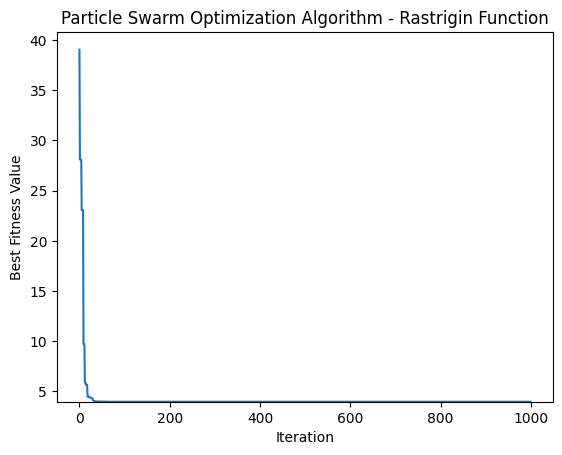

Best Solution: [ 9.94958638e-01  9.94958637e-01  9.94958639e-01 -1.20148586e-09
 -9.94958637e-01]
Time in Milliseconds: 806.9186210632324


In [43]:
# Define parameters
title_rastrigin = "Particle Swarm Optimization Algorithm - Rastrigin Function"
dimension_rastrigin = 5  # Assuming the dimension for the Rastrigin function
fitness_func_rastrigin = rastrigin
bounds_rastrigin = [-5.12, 5.12]  # Bounds for each dimension of the Rastrigin function
num_iterations_rastrigin = 1000  # Number of iterations for the PSO algorithm
num_particles_rastrigin = 50  # Number of particles in the swarm

# Create an instance of ParticleSwarmOptimizer for Rastrigin function
PSO_rastrigin = ParticleSwarmOptimizer(
    title=title_rastrigin,
    dimension=dimension_rastrigin,
    fitness_func=fitness_func_rastrigin,
    bounds=bounds_rastrigin,
    num_iterations=num_iterations_rastrigin,
    num_particles=num_particles_rastrigin
)

# Run PSO optimization for Rastrigin function
best_solution_PSO_rastrigin = PSO_rastrigin.particle_swarm_optimize()

# Evaluate and print results for Rastrigin function
best_solution_PSO_rastrigin, time_for_PSO_rastrigins = PSO_rastrigin.evaluate()


In [47]:
class Particle:
    def __init__(self, dimension, bounds):
        self.position = np.random.uniform(bounds[0], bounds[1], dimension)
        self.velocity = np.random.uniform(-1, 1, dimension)
        self.best_position = self.position.copy()
        self.best_fitness = float('inf')

class ParticleSwarmOptimizer:
    def __init__(self, title, dimension, fitness_func, bounds, num_iterations, num_particles=5, w=0.5, c1=1.5, c2=1.5, cutoff=cutoff_point):
        self.title = title
        self.dimension = dimension
        self.bounds = bounds
        self.fitness_func = fitness_func
        self.num_particles = num_particles
        self.num_iterations = num_iterations
        self.w = w  # Inertia weight
        self.c1 = c1  # Cognitive component
        self.c2 = c2  # Social component
        self.particles = self.initialize_particles()
        self.results = None
        self.best_solution = None
        self.rememberme = cutoff
        self.cutoff = cutoff
        self.timeforcutoff = None
        self.iterationcountforcutoff = None

    def initialize_particles(self):
        return [Particle(self.dimension, self.bounds) for _ in range(self.num_particles)]

    def preconditions(self):
        timer.restart()
        self.timeforcutoff = None
        self.iterationcountforcutoff = None
        self.cutoff = self.rememberme

    def evaluate(self, graph=False):
        time_taken = timer.get_time()
    
        if graph:
            plot_fitness_progress(self.results, title = self.title)
            print("Best Solution:", self.best_solution)
            print("Time in Milliseconds:", time_taken)
            if self.timeforcutoff is not None:
                print("Time for Cutoff:", self.timeforcutoff)
                print("Iteration for Cutoff:", self.iterationcountforcutoff)
                
        if self.timeforcutoff is None:
            self.timeforcutoff = time_taken
        if self.iterationcountforcutoff is None:
            self.iterationcountforcutoff = self.num_iterations
        self.results = None
        return self.best_solution, time_taken , self.iterationcountforcutoff, self.timeforcutoff

    def particle_swarm_optimize(self):
        self.preconditions()
        best_global_position = None
        best_global_fitness = float('inf')
        best_fitnesses = []

        for i in range(self.num_iterations):
            for particle in self.particles:
                fitness = self.fitness_func(particle.position)
                if fitness < particle.best_fitness:
                    particle.best_position = particle.position.copy()
                    particle.best_fitness = fitness

                if fitness < best_global_fitness:
                    best_global_position = particle.position.copy()
                    best_global_fitness = fitness
            
            if self.cutoff is not None:
                if np.all(abs(best_global_fitness) < self.cutoff):
                    self.cutoff = None
                    self.timeforcutoff = timer.get_time()
                    self.iterationcountforcutoff = i

            for particle in self.particles:
                cognitive_component = (self.c1 * random.uniform(0, 1) *
                                       (particle.best_position - particle.position))
                social_component = (self.c2 * random.uniform(0, 1) *
                                    (best_global_position - particle.position))

                for j in range(self.dimension):
                    particle.velocity[j] = (self.w * particle.velocity[j] +
                                             cognitive_component[j] +
                                             social_component[j])

                    particle.position[j] += particle.velocity[j]
            best_fitnesses.append(best_global_fitness)

        self.results = best_fitnesses
        self.best_solution = best_global_position

        return best_global_position

In [45]:
PSO = ParticleSwarmOptimizer(
    title=title_rastrigin,
    dimension=3,
    fitness_func=fitness_func_rastrigin,
    bounds=bounds_rastrigin,
    num_iterations=1000,
    num_particles=10,
    w=0.7 ,
    c1=1.5,
    c2=1.5)

best_solution = PSO.particle_swarm_optimize()
PSO.evaluate()

(array([9.94958638e-01, 9.94958640e-01, 2.81484439e-09]),
 155.8222770690918,
 1000,
 155.8222770690918)

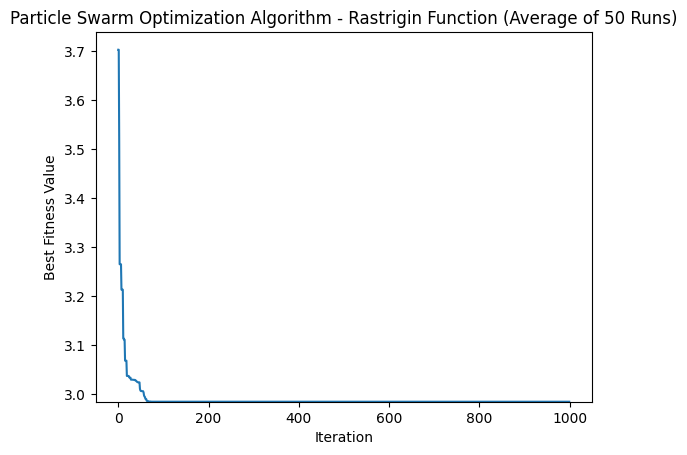

Average Best Solution: [-0.99493111  0.99493844 -0.99494411]
Average Time in Milliseconds: 67.5902509689331


In [46]:
def PSOAvg(psoptimizer, runs = 50):
    timeList = []
    solList = []
    allSolList = []
    iterlist = []
    cutofflist = []
    for i in range(runs):
        temp = psoptimizer.particle_swarm_optimize()
        allSolList.append(psoptimizer.results)
        best_solution, time_in_ms, cutoff_iter, cutoff_time = psoptimizer.evaluate()
        timeList.append(time_in_ms)
        solList.append(best_solution)
        cutofflist.append(cutoff_time)
        iterlist.append(cutoff_iter)
        
    avgSol = np.mean(solList, axis = 0)
    avgTime = sum(timeList)/runs
    avgCutoff = sum(cutofflist)/runs
    avgIter = sum(iterlist)/runs
    avgSolList =  np.mean(allSolList, axis = 0)
    
    plot_fitness_progress(avgSolList, title = psoptimizer.title+" (Average of "+str(runs)+" Runs)")

    print("Average Best Solution:", avgSol)
    print("Average Time in Milliseconds:", avgTime)

PSO = ParticleSwarmOptimizer(
    title=title_rastrigin,
    dimension=3,
    fitness_func=fitness_func_rastrigin,
    bounds=bounds_rastrigin,
    num_iterations=1000,
    num_particles=5,
    w=0.7 ,
    c1=1.5,
    c2=1.5)

PSOAvg(PSO)

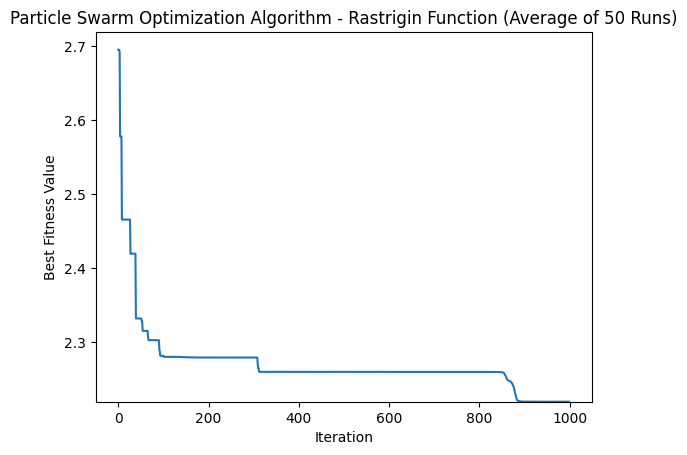

Average Best Solution: [-5.98497543e-01  3.16780724e-04  7.96786744e-01]
Average Time in Milliseconds: 127.51008987426758


In [57]:
PSO = ParticleSwarmOptimizer(
    title=title_rastrigin,
    dimension=3,
    fitness_func=fitness_func_rastrigin,
    bounds=bounds_rastrigin,
    num_iterations=1000,
    num_particles=10,
    w=0.8 ,
    c1=2,
    c2=2)

PSOAvg(PSO)

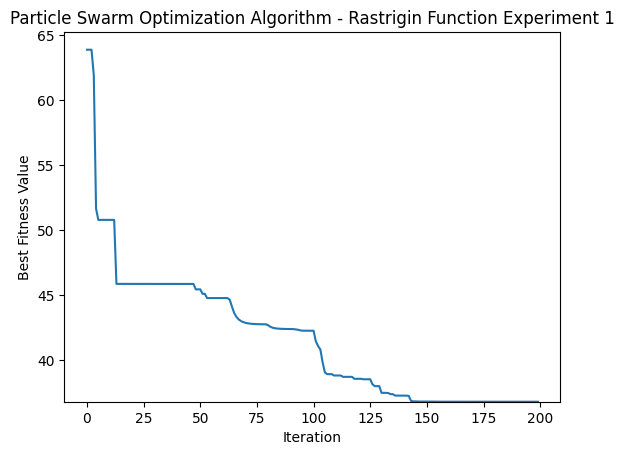

Best Solution: [-3.03348407 -0.9778765  -2.96689473 -1.03550884 -4.00186472]
Time in Milliseconds: 20.986557006835938


(array([-3.03348407, -0.9778765 , -2.96689473, -1.03550884, -4.00186472]),
 20.986557006835938,
 200,
 20.986557006835938)

In [58]:
PSO = ParticleSwarmOptimizer(
    title= "Particle Swarm Optimization Algorithm - Rastrigin Function Experiment 1",
    dimension=dimension_rastrigin,
    fitness_func=rastrigin,
    bounds=bounds_rastrigin,
    num_iterations=200,
    num_particles=5,
    w=0.7 ,
    c1=2,
    c2=2,
    cutoff = None)
PSO.particle_swarm_optimize()
PSO.evaluate(graph=True)

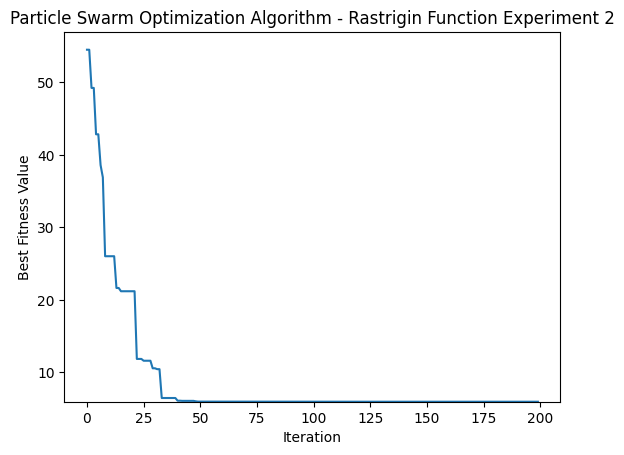

Best Solution: [ 9.94894185e-01  4.60297360e-04  1.28525089e-03 -9.95745025e-01
  1.98733576e+00]
Time in Milliseconds: 31.959056854248047


(array([ 9.94894185e-01,  4.60297360e-04,  1.28525089e-03, -9.95745025e-01,
         1.98733576e+00]),
 31.959056854248047,
 200,
 31.959056854248047)

In [56]:
PSO = ParticleSwarmOptimizer(
    title= "Particle Swarm Optimization Algorithm - Rastrigin Function Experiment 2",
    dimension=dimension_rastrigin,
    fitness_func=rastrigin,
    bounds=bounds_rastrigin,
    num_iterations=200,
    num_particles=10,
    w=0.7 ,
    c1=1.5,
    c2=1.5,
    cutoff = None)
PSO.particle_swarm_optimize()
PSO.evaluate(graph=True)

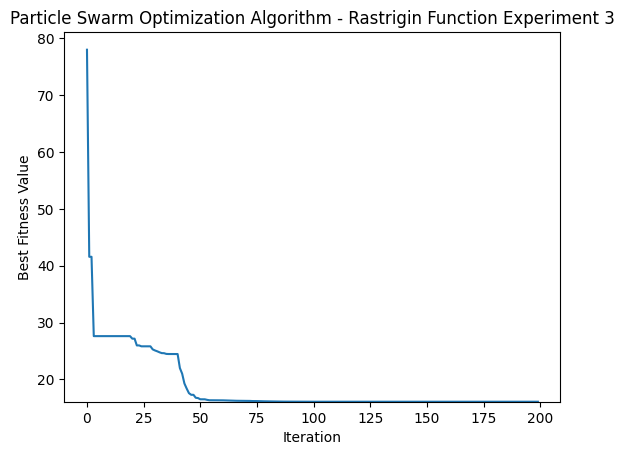

Best Solution: [ 1.04443863 -1.88284096  1.11273823 -1.92788476  0.02226847]
Time in Milliseconds: 19.972801208496094


(array([ 1.04443863, -1.88284096,  1.11273823, -1.92788476,  0.02226847]),
 19.972801208496094,
 200,
 19.972801208496094)

In [55]:
PSO = ParticleSwarmOptimizer(
    title= "Particle Swarm Optimization Algorithm - Rastrigin Function Experiment 3",
    dimension=dimension_rastrigin,
    fitness_func=rastrigin,
    bounds=bounds_rastrigin,
    num_iterations=200,
    num_particles=5,
    w=0.7 ,
    c1=1.5,
    c2=1.5,
    cutoff = None)
PSO.particle_swarm_optimize()
PSO.evaluate(graph=True)

1.1229336197661368


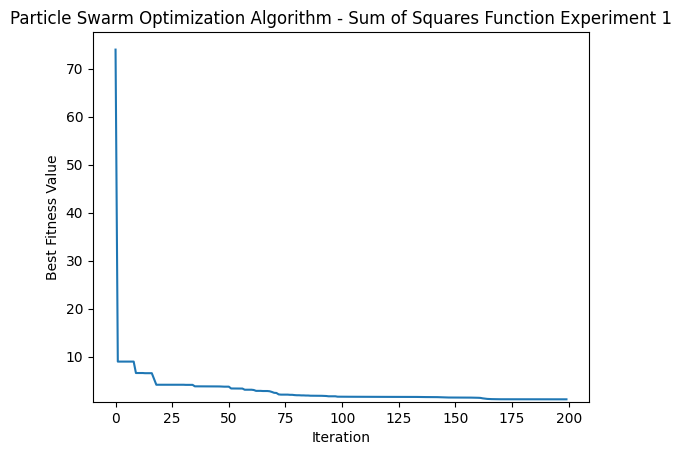

Best Solution: [ 0.14681672 -0.48417853  0.88255114  0.25346708 -0.15429695]
Time in Milliseconds: 26.92699432373047


(array([ 0.14681672, -0.48417853,  0.88255114,  0.25346708, -0.15429695]),
 26.92699432373047,
 200,
 26.92699432373047)

In [666]:
PSO = ParticleSwarmOptimizer(
    title= "Particle Swarm Optimization Algorithm - Sum of Squares Function Experiment 1",
    dimension=dimension_sos,
    fitness_func=sum_of_squares,
    bounds=sum_squares_bounds,
    num_iterations=200,
    num_particles=10,
    w=0.7 ,
    c1=2,
    c2=2,
    cutoff = None)
PSO.particle_swarm_optimize()
PSO.evaluate(graph=True)

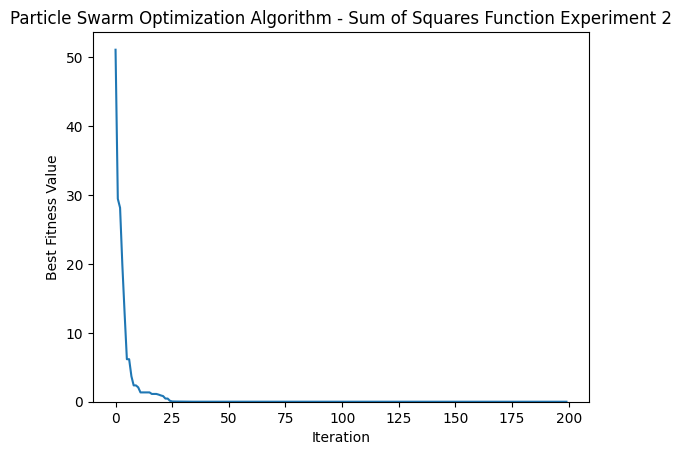

Best Solution: [ 2.08303047e-08  1.95112523e-08 -1.03754053e-08  1.73690363e-08
  1.87289231e-08]
Time in Milliseconds: 35.95113754272461


(array([ 2.08303047e-08,  1.95112523e-08, -1.03754053e-08,  1.73690363e-08,
         1.87289231e-08]),
 35.95113754272461,
 200,
 35.95113754272461)

In [53]:
PSO = ParticleSwarmOptimizer(
    title= "Particle Swarm Optimization Algorithm - Sum of Squares Function Experiment 2",
    dimension=dimension_sos,
    fitness_func=sum_of_squares,
    bounds=sum_squares_bounds,
    num_iterations=200,
    num_particles=15,
    w=0.7 ,
    c1=1.5,
    c2=1.5,
    cutoff = None)
PSO.particle_swarm_optimize()
PSO.evaluate(graph=True)

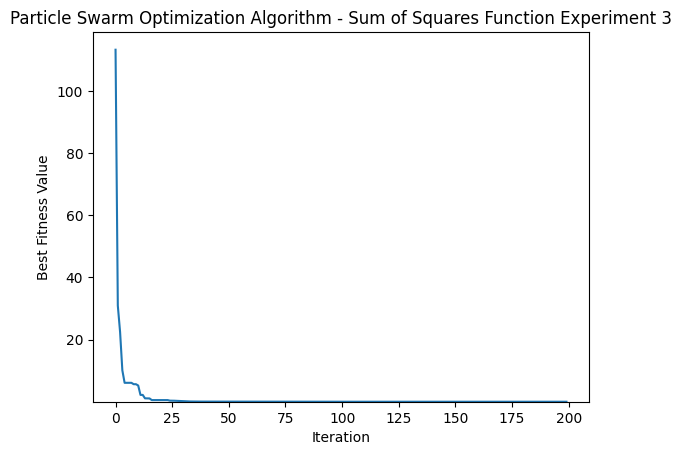

Best Solution: [ 0.00823597 -0.00328162 -0.00233426  0.00134883 -0.0017822 ]
Time in Milliseconds: 23.967742919921875


(array([ 0.00823597, -0.00328162, -0.00233426,  0.00134883, -0.0017822 ]),
 23.967742919921875,
 200,
 23.967742919921875)

In [54]:
PSO = ParticleSwarmOptimizer(
    title= "Particle Swarm Optimization Algorithm - Sum of Squares Function Experiment 3",
    dimension=dimension_sos,
    fitness_func=sum_of_squares,
    bounds=sum_squares_bounds,
    num_iterations=200,
    num_particles=10,
    w=0.7 ,
    c1=1.5,
    c2=1.5,
    cutoff = None)
PSO.particle_swarm_optimize()
PSO.evaluate(graph=True)